In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import f1_score

C:\Users\kumarabh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Load the data
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
print("The data has :",data.shape[0],' rows and ',data.shape[1]," columns.")

The data has : 99999  rows and  226  columns.


In [4]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
null_sort = data.isnull().sum().sort_values(ascending=False)
nullCount_df = pd.DataFrame({"Features": null_sort.index,"count":null_sort.values})
nullCount_df["Null_perc"] = round(((nullCount_df['count']/len(data))*100),2)
nullCount_df.head(50)

,Features,count,Null_perc
0,count_rech_2g_6,74846,74.85
1,date_of_last_rech_data_6,74846,74.85
2,count_rech_3g_6,74846,74.85
3,av_rech_amt_data_6,74846,74.85
4,max_rech_data_6,74846,74.85
5,total_rech_data_6,74846,74.85
6,arpu_3g_6,74846,74.85
7,arpu_2g_6,74846,74.85
8,night_pck_user_6,74846,74.85
9,fb_user_6,74846,74.85


We could see that, there are 40 columns which have more than 70% of rows as null

In [7]:
#all the customers are unique
data['mobile_number'].nunique()

99999

In [8]:
#check if any null values in the attributes which we gonna use for filtering high value customer
data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9']].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
total_rech_amt_9    0
dtype: int64

In [9]:
#Getting the Training data that means filtering out all the High-Value customers
# based on Average daily recharge amount for months june and july
data['total_rech_amt'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/60

In [10]:

data['total_rech_amt'].isnull().sum()

0

In [18]:
data['total_rech_amt'].describe(percentiles = [0.25, 0.50,0.70, 0.75])

count    99999.000000
mean        10.841293
std         12.361116
min          0.000000
25%          3.833333
50%          7.633333
70%         12.283333
75%         13.966667
max       1258.750000
Name: total_rech_amt, dtype: float64

In [11]:
# the cut-off value for being a valuable customer is 70th percentile
cutoff_amt = 12.3 #70th Percentile value
val_cust = data[data.total_rech_amt>=cutoff_amt]
val_cust.shape

(29979, 227)

In [12]:
val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,39.500000
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,17.300000
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,12.666667
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,15.300000
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,13.600000


In [13]:
#check if any null values in the attributes which we gonna use for marking the customer as churn and Non-Churn
val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [14]:
#label marking as churn: 1 and non-churn as 0
val_cust['churn'] = 0
val_cust.loc[(val_cust.total_ic_mou_9==0)& (val_cust.total_og_mou_9==0) & (val_cust.vol_2g_mb_9==0) & (val_cust.vol_3g_mb_9==0),'churn'] = 1

In [15]:
val_cust['churn'].describe()

count    29979.00000
mean         0.08636
std          0.28090
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: churn, dtype: float64

In [16]:
val_cust['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [17]:
#filtering the columns of month 9 and dropping them as the month 9 is churn phase
months9 = []
for col in data.columns:
    if '_9' in col:
        months9.append(col)
val_cust.drop(months9,axis = 1, inplace = True)

In [43]:
train.drop(['sep_vbc_3g'], axis = 1, inplace = True)

In [18]:
val_cust.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt,churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,...,11387.000000,11652.000000,11741.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.587624,589.424681,535.067748,299.392147,307.701888,...,0.897603,0.889804,0.837322,1264.158911,129.482436,135.225368,121.450911,6.554528,23.233821,0.08636
std,6.846594e+05,0.0,0.0,0.0,0.0,442.848876,463.049067,492.447887,462.369385,483.432401,...,0.303184,0.313147,0.369087,975.181038,390.625027,408.218570,389.910814,48.630605,16.297507,0.28090
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,12.300000,0.00000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.352500,365.235000,289.782000,43.030000,42.775000,...,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.00000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.951000,493.781000,452.232000,128.480000,128.120000,...,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,0.000000,18.966667,0.00000
75%,7.001814e+09,109.0,0.0,0.0,0.0,704.184500,700.986000,671.349500,357.655000,365.127500,...,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,26.533333,0.00000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,1258.750000,1.00000


In [19]:
#looks like some of the features has only zero values. Lets remove those columns which has constant values
const_col = [col for col in val_cust.columns if val_cust[col].nunique() == 1]
val_cust.drop(const_col,axis = 1, inplace = True)

In [20]:
val_cust.shape

(29979, 161)

<h2>Data Visualization</h2>

In [21]:
val_cust['churn'] = val_cust['churn'].map({1:'churn', 0: 'Non-Churn'})

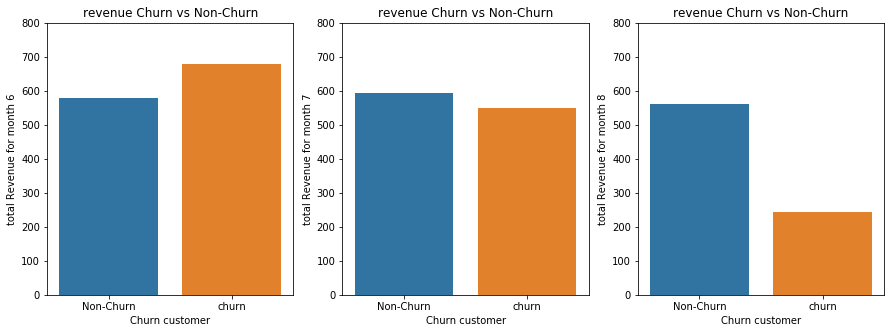

In [22]:
data6 = val_cust.groupby(['churn'])['arpu_6'].mean()
data7 = val_cust.groupby(['churn'])['arpu_7'].mean()
data8 = val_cust.groupby(['churn'])['arpu_8'].mean()
    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('revenue Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('total Revenue for month 6')
plt.ylim(0,800)
plt.xlabel('Churn customer')


plt.subplot(132)
plt.title('revenue Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
plt.ylabel('total Revenue for month 7')
plt.ylim(0,800)
plt.xlabel('Churn customer')

plt.subplot(133)
plt.title('revenue Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
plt.ylabel('total Revenue for month 8')
plt.ylim(0,800)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

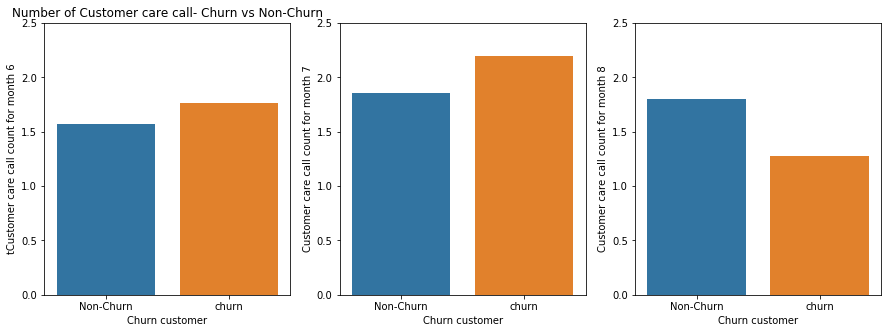

In [23]:
data6 = val_cust.groupby(['churn'])['loc_og_t2c_mou_6'].mean()
data7 = val_cust.groupby(['churn'])['loc_og_t2c_mou_7'].mean()
data8 = val_cust.groupby(['churn'])['loc_og_t2c_mou_8'].mean()

#set same x,y limits for all subplots
    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('tCustomer care call count for month 6')
plt.ylim(0,2.5)
plt.xlabel('Churn customer')

# 2nd Subplot shows the average amount of investment in each funding type.
plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
plt.ylabel('Customer care call count for month 7')
plt.ylim(0,2.5)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
plt.ylabel('Customer care call count for month 8')
plt.ylim(0,2.5)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

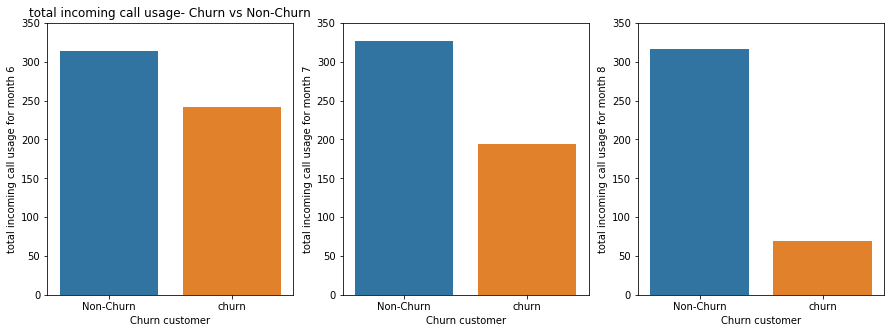

In [24]:
data6 = val_cust.groupby(['churn'])['total_ic_mou_6'].mean()
data7 = val_cust.groupby(['churn'])['total_ic_mou_7'].mean()
data8 = val_cust.groupby(['churn'])['total_ic_mou_8'].mean()

    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('total incoming call usage- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('total incoming call usage for month 6')
plt.ylim(0,350)
plt.xlabel('Churn customer')

plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
plt.ylabel('total incoming call usage for month 7')
plt.ylim(0,350)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
plt.ylabel('total incoming call usage for month 8')
plt.ylim(0,350)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

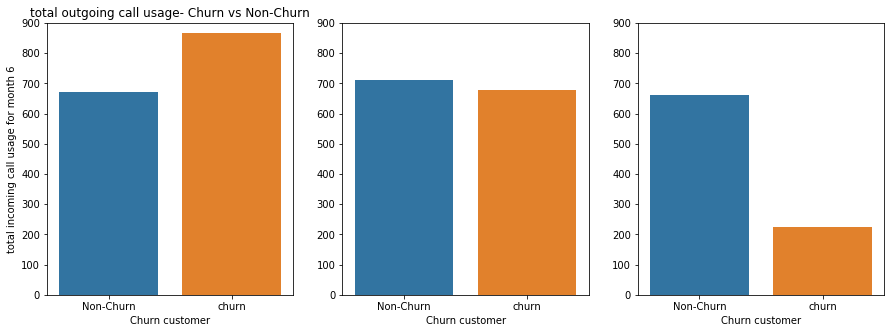

In [25]:
data6 = val_cust.groupby(['churn'])['total_og_mou_6'].mean()
data7 = val_cust.groupby(['churn'])['total_og_mou_7'].mean()
data8 = val_cust.groupby(['churn'])['total_og_mou_8'].mean()
    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('total outgoing call usage- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('total incoming call usage for month 6')
plt.ylim(0,900)
plt.xlabel('Churn customer')

plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
#plt.ylabel('total outgoing call usage for month 7')
plt.ylim(0,900)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
#plt.ylabel('total outgoing call usage for month 8')
plt.ylim(0,900)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

In [26]:
val_cust['net_vol_6'] = val_cust['vol_2g_mb_6']+ val_cust['vol_3g_mb_6']
val_cust['net_vol_7'] = val_cust['vol_2g_mb_7']+ val_cust['vol_3g_mb_7']
val_cust['net_vol_8'] = val_cust['vol_2g_mb_8']+ val_cust['vol_3g_mb_8']

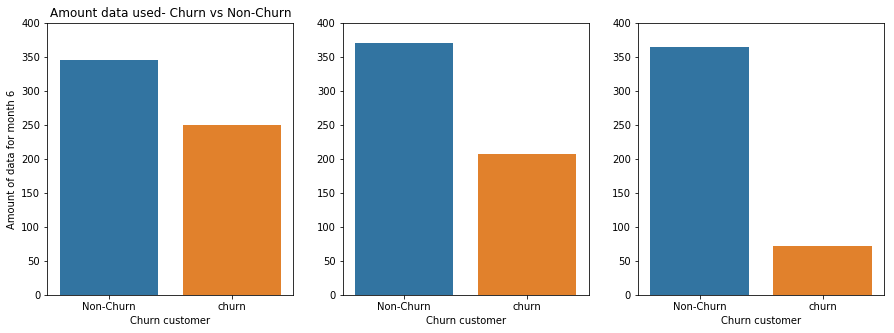

In [27]:
data6 = val_cust.groupby(['churn'])['net_vol_6'].mean()
data7 = val_cust.groupby(['churn'])['net_vol_7'].mean()
data8 = val_cust.groupby(['churn'])['net_vol_8'].mean()

plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('Amount data used- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('Amount of data for month 6')
plt.ylim(0,400)
plt.xlabel('Churn customer')


plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
#plt.ylabel('total outgoing call usage for month 7')
plt.ylim(0,400)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
#plt.ylabel('total outgoing call usage for month 8')
plt.ylim(0,400)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

In the above Visualization Graph We observed that the network usage of Customer from good Phase to Action phase has significantly decreased either it is incoming Call or Outgoing Call Usage or it is Internet usage. 

In [33]:
val_cust['churn'] = val_cust['churn'].map({"churn":1, "Non-Churn":0})
target = val_cust['churn']
train = val_cust.drop(['churn'], axis = 1)

In [34]:
num_col = [col for col in train.columns if train[col].dtype != 'object']
cat_col = [col for col in train.columns if train[col].dtype == 'object']
cat_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [35]:
train[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 6 columns):
date_of_last_rech_6         29917 non-null object
date_of_last_rech_7         29865 non-null object
date_of_last_rech_8         29385 non-null object
date_of_last_rech_data_6    11387 non-null object
date_of_last_rech_data_7    11652 non-null object
date_of_last_rech_data_8    11741 non-null object
dtypes: object(6)
memory usage: 1.6+ MB


In [36]:
for col in cat_col:
    train[col] = pd.to_datetime(train[col], format = "%m/%d/%Y")

In [37]:
from datetime import datetime
#processing the date
#We will extract the weekday and day from each date feature 
def process_date(col):
    train[col+'weekday'] = train[col].dt.weekday
    train[col+'day'] = train[col].dt.day

In [38]:
for col in cat_col:
    process_date(col)

In [39]:
#we have taken two columns out of each date attribute. we will drop the actual ones now
train.drop(cat_col, axis = 1, inplace = True)

In [40]:
cust_id = train['mobile_number']
train.drop(['mobile_number'], axis = 1, inplace = True)

In [41]:
#filling the null values with zero
train.fillna(0, inplace = True)

<h2>Feature Engineering</h2>

In [42]:
train.shape , target.shape

((29979, 168), (29979,))

In [44]:
ic_og_features = [] #list containg all the incoming and outgoing call features
ic_og_good_prd = [] #list containg all the incoming and outgoing call features for 6th and 7th months
for col in train.columns:
    if "_ic_" in col:
        ic_og_features.append(col)
    if "_og_" in col:
        ic_og_features.append(col)
for col in ic_og_features:
    if "_6" in col:
        ic_og_good_prd.append(col)
    if "_7" in col:
        ic_og_good_prd.append(col)

In [45]:
#list describing different types of incoming and outgoing callscalls
roam_ic_features = []
loc_ic_features = []
std_ic_features = []
spl_ic_features = []
isd_ic_features = []
roam_og_features = []
loc_og_features = []
std_og_features = []
spl_og_features = []
isd_og_features = []
for col in ic_og_good_prd:
    if "roam_ic_" in col:
        roam_ic_features.append(col)
    if "loc_ic_" in col:
        loc_ic_features.append(col)
    if "std_ic_" in col:
        std_ic_features.append(col)
    if "spl_ic_" in col:
        spl_ic_features.append(col)
    if "isd_ic_" in col:
        isd_ic_features.append(col)
    if "roam_og_" in col:
        roam_og_features.append(col)
    if "loc_og_" in col:
        loc_og_features.append(col)
    if "std_og_" in col:
        std_og_features.append(col)
    if "spl_og_" in col:
        spl_og_features.append(col)
    if "isd_og_" in col:
        isd_og_features.append(col)

In [46]:
#totaling different kinds of incoming and outgoing calls 
train['total_roam_ic'] = 0
for col in roam_ic_features:
    train['total_roam_ic'] += train[col]
    
train['total_loc_ic'] = 0
for col in loc_ic_features:
    train['total_loc_ic'] += train[col]
    
train['total_std_ic'] = 0
for col in std_ic_features:
    train['total_std_ic'] += train[col]
    
train['total_spl_ic'] = 0
for col in spl_ic_features:
    train['total_spl_ic'] += train[col]
    
train['total_isd_ic'] = 0
for col in isd_ic_features:
    train['total_isd_ic'] += train[col]

train['total_roam_og'] = 0
for col in roam_og_features:
    train['total_roam_og'] += train[col]
    
train['total_loc_og'] = 0
for col in loc_og_features:
    train['total_loc_og'] += train[col]
    
train['total_std_og'] = 0
for col in std_og_features:
    train['total_std_og'] += train[col]
    
train['total_spl_og'] = 0
for col in spl_og_features:
    train['total_spl_og'] += train[col]
    
train['total_isd_og'] = 0
for col in isd_og_features:
    train['total_isd_og'] += train[col]

In [47]:
train['night_pck_good_prd'] = (train['night_pck_user_6']==1) & (train['night_pck_user_7']==1)# yes is night pack user for both good pahse months
train['fb_good_prd'] = (train['fb_user_6']==1) & (train['fb_user_7']==1) # if its a fb pack user in both month
train['night_nd_fb_user']  = train['night_pck_good_prd'] & train['fb_good_prd'] #if its both fb and night pack user

In [48]:
train['night_pck_good_prd'] = train['night_pck_good_prd'].map({True:1, False:0})
train['fb_good_prd'] = train['fb_good_prd'].map({True:1, False:0})
train['night_nd_fb_user'] = train['night_nd_fb_user'].map({True:1, False:0})

In [49]:
train['avg_rech_amt_per'] = train['total_rech_amt']
del train['total_rech_amt']

In [50]:
train['total_rech_num'] = train['total_rech_num_6'] + train['total_rech_num_7'] #total rech number for good phase
train['total_rech_data'] = train['total_rech_data_6'] + train['total_rech_data_7']#total rech data for good phase
train['total_count_rech_2g'] = train['count_rech_2g_6'] + train['count_rech_2g_7']#2g Rech counts for good phase
train['total_count_rech_3g'] = train['count_rech_3g_6'] + train['count_rech_3g_7']#3g Rech count for good phase
train['avg_rech_data'] = train['av_rech_amt_data_6'] + train['av_rech_amt_data_7']#average reacharge amount for 2 months

In [51]:
#total amount of internet used for each months
train['net_vol_6'] = train['vol_2g_mb_6']+ train['vol_3g_mb_6']
train['net_vol_7'] = train['vol_2g_mb_7']+ train['vol_3g_mb_7']
train['net_vol_8'] = train['vol_2g_mb_8']+ train['vol_3g_mb_8']

In [52]:
#total number of calls to customer care in good pahse
train['total_call_to_CC'] = train['loc_og_t2c_mou_6'] + train['loc_og_t2c_mou_7']

In [214]:
train.shape

(29979, 186)

<h3>Feature Selection Using RFE</h3>

In [152]:
#Splitting the data in train and test data
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 100)

In [153]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression(random_state=2)
rfe = RFE(logreg, 100)   #out of 186 attribute we will select the top 100 attributes for the modeling.          
rfe = rfe.fit(x_train, y_train)

In [164]:
col = x_train.columns[rfe.support_] 
col

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'sp

In [155]:
x_test = x_test[col]
x_train = x_train[col]

In [166]:
#scaling the data
scaler = StandardScaler()
scaler.fit(x_train2)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [212]:
x_train.shape, x_test.shape

((20985, 100), (8994, 100))

In [167]:
#lets do PCA and do the dimensionality reduction. It will also remove the Multi-Collinearity
pca = PCA(0.90, random_state=100)
train_pca = pca.fit_transform(x_train)
train_pca.shape

(20985, 43)

In [168]:
test_pca = pca.transform(x_test)
test_pca.shape

(8994, 43)

In [213]:
train_pca.shape, test_pca.shape

((20985, 43), (8994, 43))

So we have done the dimensionality reduction from <b>100 features to just 43 principal components</b> at the penalty of 10 percent data variance loss. But we have reduce the computation cost

<h2>Modelling</h2>

In [173]:
#Fitting default Logistic Regression
lgr = LogisticRegression(random_state=2)
lgr.fit(train_pca, y_train)

y_pred_lgr = lgr.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_lgr ), "Recall Score", recall_score(y_test, y_pred_lgr), 
      "Accuracy Score", accuracy_score(y_test, y_pred_lgr))

Precision Score 0.651685393258427 Recall Score 0.2846625766871166 Accuracy Score 0.9213920391372026


In [174]:
#fitting the default Random Forest Classifier
rf = RandomForestClassifier(random_state=2)
rf.fit(train_pca, y_train)

y_pred_rf = rf.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_rf ), "Recall Score", recall_score(y_test, y_pred_rf),
      "Accuracy Score", accuracy_score(y_test, y_pred_rf))

Precision Score 0.6523605150214592 Recall Score 0.18650306748466258 Accuracy Score 0.9172781854569713


In [175]:
#fitting the default Support Vector Classifier
svc = SVC(random_state=2)
svc.fit(train_pca, y_train)

y_pred_svc = svc.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_svc ), "Recall Score", recall_score(y_test, y_pred_svc),
      "Accuracy Score", accuracy_score(y_test, y_pred_svc))

Precision Score 0.7005988023952096 Recall Score 0.2871165644171779 Accuracy Score 0.9242828552368245


In [176]:
#Using the Naive bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_pca, y_train)

GaussianNB(priors=None)

In [177]:
y_pred_gnb = gnb.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_gnb), "Recall Score", recall_score(y_test, y_pred_gnb), 
      "Accuracy Score", accuracy_score(y_test, y_pred_gnb))

Precision Score 0.14897739504843918 Recall Score 0.849079754601227 Accuracy Score 0.5468089837669557


In [178]:
evl_df = pd.DataFrame({'algo':['logreg','rf','svc', 'gnb'],'accuracy':[accuracy_score(y_test,y_pred_lgr), 
                                                                       accuracy_score(y_test,y_pred_rf),
                                                                       accuracy_score(y_test,y_pred_svc),
                                                                       accuracy_score(y_test, y_pred_gnb)]})

In [179]:
evl_df['precision'] = pd.Series([precision_score(y_test,y_pred_lgr), precision_score(y_test,y_pred_rf),precision_score(y_test,y_pred_svc),precision_score(y_test, y_pred_gnb)])
evl_df['recall'] = pd.Series([recall_score(y_test,y_pred_lgr), recall_score(y_test,y_pred_rf),recall_score(y_test,y_pred_svc),recall_score(y_test, y_pred_gnb)])
evl_df.head()

,algo,accuracy,precision,recall
0,logreg,0.921392,0.651685,0.284663
1,rf,0.917278,0.652361,0.186503
2,svc,0.924283,0.700599,0.287117
3,gnb,0.546809,0.148977,0.849080


For large data support vectors will be very slow and we will not be able to converge due to the limited resource we have. So We wont move further with SVC model.
For Gaussian Naive Bayes model, the recall is really good that is 85% which means its able to identify more number of customer which are churned. But on the other hand the accuracy and precision is very low as compared to other models which means it is wrongly identifying more number of Non-Churned customer as Churned.

<h4>Therefore, we will choose Logistic Regression and Random Forest algorithm, which have far better accuracy and reasonable Recall and we will try to hypertune them considering scoring as RECALL</h4>

We are using RECALL as an deciding evaluation metric because Recall is the True Positive Rate and it tries to minimize False negative (Churn classified as Non-Churn) and maximize the True Positive (Churn Classified as churn). This will help company to put the advertisments and spending to thr right customer.

In [180]:
#lets hypertune the Logistic Regression using GridSearchCV
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state=2)
params = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
logreg = LogisticRegression(random_state=2)
GridSearch = GridSearchCV(logreg, params, scoring = 'recall',cv=folds, verbose=1, return_train_score=True)
GridSearch.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [181]:
print("The best C value is: ",GridSearch.best_params_)
print("The best Recall Value is: ",GridSearch.best_score_)

The best C value is:  {'C': 10}
The best Recall Value is:  0.27592375577176476


In [182]:
logreg = LogisticRegression(C = 10, random_state=2)
logreg.fit(train_pca,y_train)

y_pred_lr = logreg.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_lr ), "Recall Score", recall_score(y_test, y_pred_lr), 
      "Accuracy Score", accuracy_score(y_test, y_pred_lr))

Precision Score 0.6526610644257703 Recall Score 0.28588957055214725 Accuracy Score 0.9215032243718034


In [183]:
#Lets see if the model has overfit. Looking at the difference between train and test accuracy not much difference
y_pred_train = logreg.predict(train_pca)
print("Train Accuracy : ", accuracy_score(y_train, y_pred_train))

Train Accuracy :  0.9254705742196807


In [184]:
#after seeing the test accuracy and train accuracy, it doesn't seem that the model has Overfit
#lets check it through Cross-Validation
score = cross_val_score(logreg, x_train, y_train, scoring = "accuracy", cv = 5)
score

array([0.92472606, 0.92613772, 0.92709078, 0.92518466, 0.9249285 ])

The train accuracy of the cross validation score over five fold is almost same... So the model is not overfitting.

In [185]:
#Handling Class Imbalance problem, We are using Bagging technique to address the problem
from sklearn.ensemble import BaggingClassifier

bg_clf = BaggingClassifier(logreg, n_estimators = 30, max_samples = 100, n_jobs = -1,
                          bootstrap = True)
bg_clf.fit(train_pca, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=30, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [186]:
y_pred_lr =bg_clf.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_lr ), "Recall Score", recall_score(y_test, y_pred_lr), 
      "Accuracy Score", accuracy_score(y_test, y_pred_lr))

Precision Score 0.5684410646387833 Recall Score 0.36687116564417177 Accuracy Score 0.9173893706915721


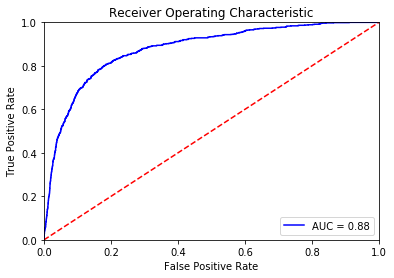

In [187]:
#lets do the AUC-ROC curve for the model
probs = bg_clf.predict_proba(test_pca)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

That's a Good sign about the model, The Area Under the Curve (AUC) is 0.88 which is quite good.

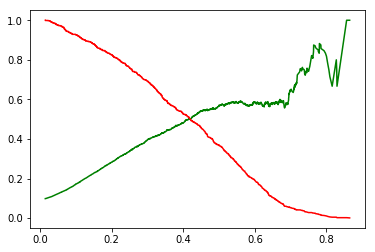

In [188]:
#Lets check the Precision-Recall trade-off and find out the optimal threshold
from sklearn.metrics import precision_recall_curve
churn_df = pd.DataFrame({'churn':y_test.values,'pred_prob':bg_clf.predict_proba(test_pca)[:,1],'y_pred':bg_clf.predict(test_pca)})

p, r, thresholds = precision_recall_curve(churn_df.churn, churn_df.pred_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [189]:
churn_df['final_pred'] = churn_df.pred_prob.map(lambda x: 1 if x > 0.416 else 0)

print("Precision Score: ", precision_score(churn_df['churn'], churn_df['final_pred'] ), "Recall Score: ", 
      recall_score(churn_df['churn'],churn_df['final_pred']))

print("Accuracy Score:", accuracy_score(churn_df['churn'], churn_df['final_pred']))

Precision Score:  0.5012106537530266 Recall Score:  0.5079754601226993
Accuracy Score: 0.909606404269513


In [191]:
#Now Lets Tune the Random Forest classifier and check if we are able to get higher Recall Value
param_grid = [
{'n_estimators': [15, 25, 35], 'max_features': [15, 25, 35], 
 'max_depth': [40,50,60]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=folds, scoring='recall',n_jobs= -1)
grid_search_forest.fit(train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [15, 25, 35], 'max_features': [15, 25, 35], 'max_depth': [40, 50, 60]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [192]:
print("The best C value is: ",grid_search_forest.best_params_)
print("The best Recall Value is: ",grid_search_forest.best_score_)

The best C value is:  {'max_depth': 40, 'max_features': 35, 'n_estimators': 25}
The best Recall Value is:  0.3141351625263278


In [194]:
#we have kept bootstrap =True, which will enable Bagging. Bagging tackles Class imbalance Problem.
GS_rf = RandomForestClassifier(n_estimators=25,max_depth=40, max_features = 35,bootstrap=True, random_state=2)
GS_rf.fit(train_pca,y_train)

y_pred_rf = GS_rf.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_rf ), "Recall Score", recall_score(y_test, y_pred_rf), 
      "Accuracy Score", accuracy_score(y_test, y_pred_rf))

Precision Score 0.6780104712041884 Recall Score 0.3177914110429448 Accuracy Score 0.9245052257060262


In [195]:
#Lets see the model has overfit. The Train Accuracy is has not very big difference than the test accuracy.
#so, its good. Looks like model is not overfittig
y_pred_train_rf = GS_rf.predict(train_pca)
print("Train Accuracy : ", accuracy_score(y_train, y_pred_train_rf)) 

Train Accuracy :  0.998522754348344


In [196]:
#after seeing the test accuracy and train accuracy, it doesn't seem that the model has Overfit
#lets check it through Cross-Validation
score = cross_val_score(GS_rf, x_train, y_train, scoring = "accuracy", cv = 5)
score

array([0.93854216, 0.93757446, 0.94162497, 0.94615201, 0.94447092])

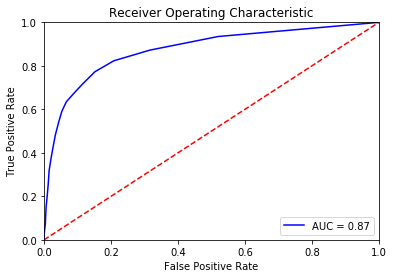

In [197]:
#lets do the AUC-ROC curve for the model
probs = GS_rf.predict_proba(test_pca)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

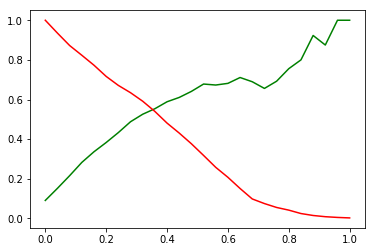

In [198]:
#Lets check the Precision-Recall trade-off and find out the optimal threshold
from sklearn.metrics import precision_recall_curve
churn_df = pd.DataFrame({'churn':y_test.values,'pred_prob':GS_rf.predict_proba(test_pca)[:,1],'y_pred':GS_rf.predict(test_pca)})

p, r, thresholds = precision_recall_curve(churn_df.churn, churn_df.pred_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [209]:
churn_df['final_pred'] = churn_df.pred_prob.map(lambda x: 1 if x > 0.33 else 0)

print("Precision Score: ", precision_score(churn_df['churn'], churn_df['final_pred'] ), "Recall Score: ", 
      recall_score(churn_df['churn'],churn_df['final_pred']))

print("Accuracy Score:", accuracy_score(churn_df['churn'], churn_df['final_pred']))

Precision Score:  0.5534591194968553 Recall Score:  0.5398773006134969
Accuracy Score: 0.9188347787413832


<h3>Conclusion</h3>

After HyperTuning and Comparing the Logistic Regression and Random Forest Classifier, below are the observations:
- The Area Under the curve for  Logistic Regression is 0.88 and 0.87 for Random Forest
- After hypertuning and handling the class Imbalance problem, the best accuracy we could achieve is 0.92 for LR          model and for RF the best accuracy is 0.92.
- The RECALL is 0.37 for Logistic Regression and 0.32 for the Random Forest.
- Since, the Recall is important in this case as the company would want to identify more Actual Churn customer on       the penalty of few Non-Churn customer identified as Churn. Hence, we used Precision-Recall trade-off graph,
  which gave 0.51 Recall and 0.91 Accuracy for Logistic Regression at threshhold 0.416. Similarly, The Random            Forest Classifier gave  0.54 Recall and 0.92 Accuracy at Threshold 0.33.

So looking at the Recall and accuracy score above we can conclude that the Random Forest Classifier has outperformed the Logistic Regression when we give importance to RECALL and select the optimum Threshold out of Precision-Recall Tradeoff.

We have RECALL as a deciding evaluation metric because Recall is the True Positive Rate and it tries to minimize False negative (Churn classified as Non-Churn) and maximize the True Positive (Churn Classified as churn). This will help company to put the advertisments and spending to the right customer.